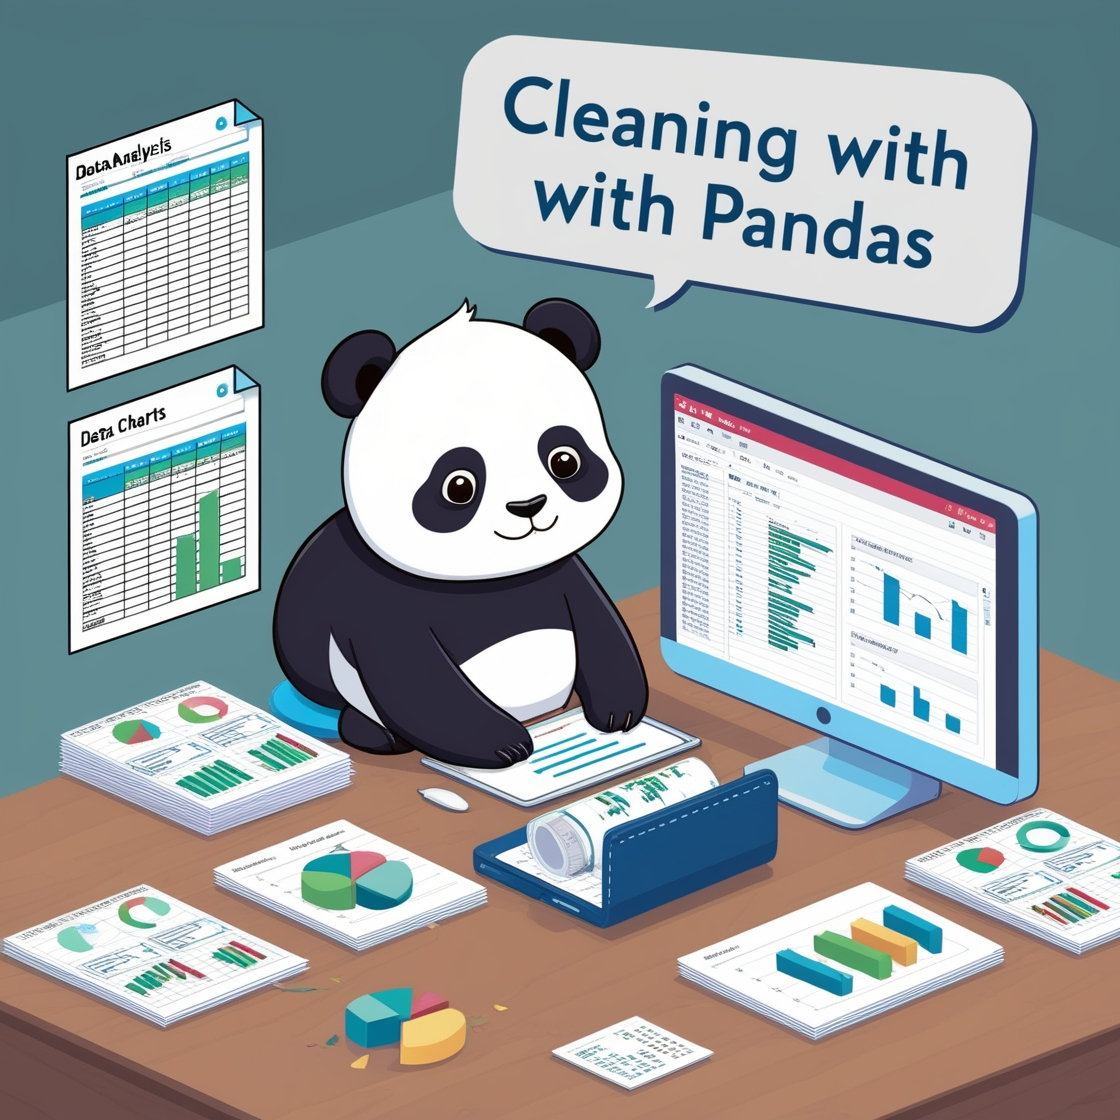

In [ ]:
import pandas as pd
df = pd.read_csv('/kaggle/input/data-clean/fifa21 raw data v2.csv')



### Basic Attributes and Methods

Now, we will demonstrate some of the basic attributes and methods related to pandas.

- `df.info()`: [Method used for getting information about number of rows, columns, count of not null, memory usage. You can read more about it in the documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)
- `df.head()`: [Method that views the first 5 rows of the DataFrame. You can pass any number in the brackets that will represent any number of rows you want to view.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)
- `df.tail()`: [Method that views the last 5 rows of the DataFrame. You can pass any number in the brackets that will represent any number of rows you want to view.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html)
- `df.describe()`: [Method that can view the summary statistics for numerical columns. You can read more about this in the documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
- `df.shape`: [Attribute that is used to find out the number of rows and columns.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) (Can you remember the same method in NumPy?)
- `df.columns`: [Attribute that is used to view the column names and it's an iterator by default.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) You can see more in the documentation.

---

- `df.index`: [Gets the index labels of the DataFrame.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.index.html)
- `df.T`: [Transposes the DataFrame, swapping rows with columns.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html)
- `df.dtypes`: [Returns the data types of each column.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)
- `df.sort_values(by='column_name')`: [Sorts the DataFrame based on a specific column.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
- `df.dropna()`: [Removes rows with missing values.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
- `df.fillna(value)`: [Replaces missing values with a specified value.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- `df.isnull().sum()`: [Counts the number of missing values in each column.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html)
- `df.rename(columns={'old_name': 'new_name'})`: [Renames columns in the DataFrame.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)
- `df[df['column_name'] > value]`: [Filters the DataFrame based on a condition.](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)
- `df['new_column'] = ...`: [Adds a new column to the DataFrame.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html)
- `df.drop(columns=['column_name'])`: [Drops a column from the DataFrame.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

---

Let’s see some code!


In [ ]:
df.info()


In [ ]:
df.head(10)

# If you notice that not all 75 columns are shown:
## To show all columns, use the following command:
- pd.set_option()  [Documentation for pd.set_option](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html)








In [ ]:
pd.set_option('display.max_columns', None)


In [ ]:
# now all columns will dispalay
df.head(5)

# Now we will make the data cleaning


In [ ]:
#frist we need see null vaues 
df.isnull().sum()


In [ ]:
# with this we can see all rows
pd.set_option('display.max_rows', None)


In [ ]:
df.isnull().sum()


## as we see there are null in Hits 2595 rows
## and in Loan Date End  17966 but we can't dorp the nulls in this colunm bec this is more than 50% of my data we will handle in in the part of handling missing values 




In [ ]:
df = df.dropna(subset=['Hits'])

# now we will see the duplicated rows

In [ ]:
df.duplicated().sum()


## we didn't have a duplicated rows in this dataset but if have we must use:
[-drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

# now we must split the columns Contract to two colunms the startdate and end date

## me must insure that the colunm is str to make on it splite

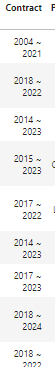
## in pat we add the character with the 2 colunms 
## get more information about 
[-split ](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html)

In [ ]:
df['Contract']=df['Contract'].astype(str)
df['start date']=df['Contract'].str.split(pat='~').str[0]
df['end date']=df['Contract'].str.split(pat='~').str[1]
#after make splite we dont need the colunm we split we need to drop it 
df=df.drop(columns='Contract')


# When cleaning date data, one of the most challenging steps is handling different date formats like mm/dd/yyyy, dd/mm/yyyy, or dd-mm-yyyy. This can lead to errors if not properly addressed. The method to handle these variations involves identifying the format of each date and converting them to a consistent format that can be easily analyzed. This way, regardless of how the date is originally written, it will be standardized and ready for further processing.

In [ ]:
def extract_date(date_string):
    try:
        return pd.to_datetime(date_string, errors='coerce').strftime('%d/%m/%Y')
    except ValueError:
        return None  

df['Joined'] = df['Joined'].apply(extract_date)

# get more information about [pd.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

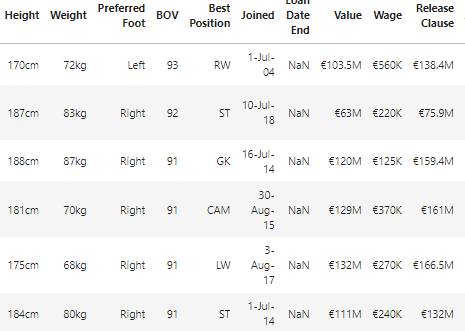

## To convert height, weight, value, wage, and release clause data to integers for normalization, you first need to remove any special characters or strings that might cause errors. Here's how you can do it:

1. Remove Non-Numeric Characters: Use a method to strip out any characters that aren't digits. For example, this might include symbols like $, €, ,, or units like "cm" and "kg."
2. Convert to Integer: Once the data is clean and contains only numeric characters, you can safely convert it to an integer type for normalization.

In [ ]:
#def clean_to_int(value):
 #   value = ''.join(filter(str.isdigit, value))  # Remove non-numeric characters
    #  return int(value)
# you can apply this methed but i want make it with different way
df[['Age', 'Height', 'Weight', 'Wage', 'Skill','Value']] = df[['Age', 'Height', 'Weight', 'Wage', 'Skill','Value']].replace(r'\D', '', regex=True).astype(int)
#this will remove every thing and keep the int only

# Steps to Handle Outliers


In [ ]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df['Value'] < lower_bound) | (df['Value'] > upper_bound))]

# this to show that the different of date before and after remove the outliers

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['Value'])
plt.title('Before Removing Outliers')

plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['Value'])
plt.title('After Removing Outliers')

# and we the make it with the z score or Modified Z-Score this is the code



# Outlier Detection Using Z-Scores

In this section, we will use two methods to detect outliers in our dataset: the normal Z-score and the Modified Z-score.

## Normal Z-Score

The Z-score measures how many standard deviations a data point is from the mean. Here's how we calculate it:

```python
df['Z-Score'] = (df['Value'] - df['Value'].mean()) / df['Value'].std()


# Outlier Detection and Normalization

In this section, we will cover two key techniques: calculating the Modified Z-score for outlier detection and performing Min-Max normalization.

## Modified Z-Score

The Modified Z-score is used to detect outliers and is based on the median and the Median Absolute Deviation (MAD). Here’s how to calculate it:

1. **Calculate the Median and MAD:**

```python
median = df['Value'].median()
mad = np.median(np.abs(df['Value'] - median))


# [learn more about the handle outliers ](https://youtu.be/rzR_cKnkD18?si=_0tMJzRvMMsYhz-6)

# now we make the date type for the date by [astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html#pandas.DataFrame.astype)

In [ ]:
df[['Age', 'Height', 'Weight', 'Wage', 'Skill','Value']] = df[['Age', 'Height', 'Weight', 'Wage', 'Skill','Value']].astype(int)


# Benefits of Z-Score Normalization:
* Standardized Scale: Transforms data to have a mean of 0 and a standard deviation of 1, making it easier to compare and interpret.
* Improved Model Performance: Helps algorithms that assume data is normally distributed or sensitive to feature scaling.
* Detects Outliers: Standard deviations can highlight outliers as they fall far from the mean.
* Facilitates Convergence: Enhances convergence speed and stability in gradient-based algorithms.
* Consistent Comparisons: Allows for direct comparison across features with different units and scales.

In [ ]:
from scipy.stats import zscore
df_nor = df[['Age', 'Height', 'Weight', 'Wage', 'Skill']].apply(zscore)
df_nor.head(10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age', 'Height', 'Weight', 'Wage', 'Skill']] = scaler.fit_transform(df[['Age', 'Height', 'Weight', 'Wage', 'Skill']])


df.head(10)

# Benefits of Min-Max Normalization:
* Uniform Scale: Transforms data to a range between 0 and 1, making it easy to compare features.
* Improved Model Accuracy: Ensures that all features contribute equally to the model, especially for algorithms that rely on distance measures.
* Consistent Interpretation: Makes interpretation of the data straightforward as all features are on the same scale.
* Facilitates Algorithms: Enhances performance of algorithms sensitive to feature scaling, such as neural networks and k-means clustering.
* Preserves Relationships: Maintains the original distribution and relationships between features, just scaled to a different range.

In [ ]:
df.columns = [column.lower() for column in df.columns]
df.columns


# Data Cleaning Process

In this section, we will cover the handling of missing data in our DataFrame. 

## Filling Missing Data

First, we'll handle missing data by filling in specific values where appropriate. We use the `fillna` method to achieve this. Here’s how we do it:

this from a tesk i made before
```python
df = df.fillna({
    'Courier Status': "Cancelled",
    'currency': "no currency",
    'Amount': 0,
    'promotion-ids': "no promotion ids"
})


# Handling Missing Data and Column Management

In this section, we will discuss how to handle missing data and manage columns based on specific conditions.

## Updating the `fulfilled-by` Column

We use the `np.where` function to update the `'fulfilled-by'` column based on conditions from other columns. This allows us to fill in missing values or adjust existing values based on `certain patterns`.

### Code Explanation

```python
df['fulfilled-by'] = np.where(
    (df['ship-service-level'] == 'Standard') & (df['Status'] == 'Shipped'), 'Easy Ship', 
    np.where(
        (df['Status'].isin(['Unshipped', 'Cancelled'])), 'Cancelled', 
        np.where(
            (df['ship-service-level'] == 'Expedited') & (df['Status'] == 'Shipped'), 'Expedited Ship', 
            df['fulfilled-by']
        )
    )
)


## Data Handling Conditions and Actions

### Condition 1
- **Condition**: 
  - If `ship-service-level` is `Standard` 
  - And `Status` is `Shipped`
- **Action**: 
  - Set `fulfilled-by` to `Easy Ship`

### Condition 2
- **Condition**: 
  - If `Status` is either `Unshipped` or `Cancelled`
- **Action**: 
  - Set `fulfilled-by` to `Cancelled`

### Condition 3
- **Condition**: 
  - If `ship-service-level` is `Expedited` 
  - And `Status` is `Shipped`
- **Action**: 
  - Set `fulfilled-by` to `Expedited Ship`

### Fallback
- **Action**: 
  - If none of the conditions are met, retain the original value in `fulfilled-by`


# `df.fillna(value)`: [Method used to fill NA/NaN values with a specified value. You can pass a scalar, dictionary, or method like 'ffill' (forward fill) or 'bfill' (backward fill). You can read more about it in the documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)


# now we finishing the date cleaning step